In [1]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

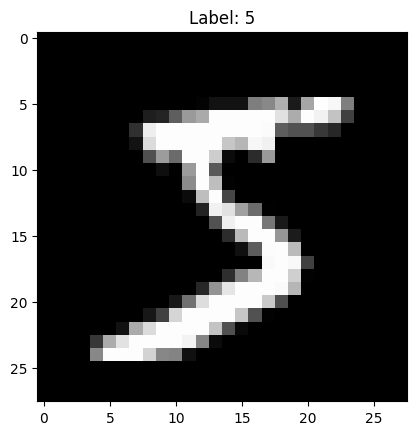

In [2]:
# Load from MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Visualize 
plt.imshow(x_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()


In [3]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Agrega Dropout
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Agrega Dropout
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Agrega Dropout
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8290 - loss: 0.5191 - val_accuracy: 0.9833 - val_loss: 0.0497
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9675 - loss: 0.1099 - val_accuracy: 0.9866 - val_loss: 0.0390
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9767 - loss: 0.0798 - val_accuracy: 0.9893 - val_loss: 0.0306
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9798 - loss: 0.0670 - val_accuracy: 0.9909 - val_loss: 0.0259
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9831 - loss: 0.0560 - val_accuracy: 0.9903 - val_loss: 0.0278
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9832 - loss: 0.0548 - val_accuracy: 0.9907 - val_loss: 0.0246
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9856 - loss: 0.0475 - val_accuracy: 0.9910 - val_loss: 0.0250
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9859 - loss: 0

In [5]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9917 - loss: 0.0241

Test accuracy: 0.9916999936103821


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


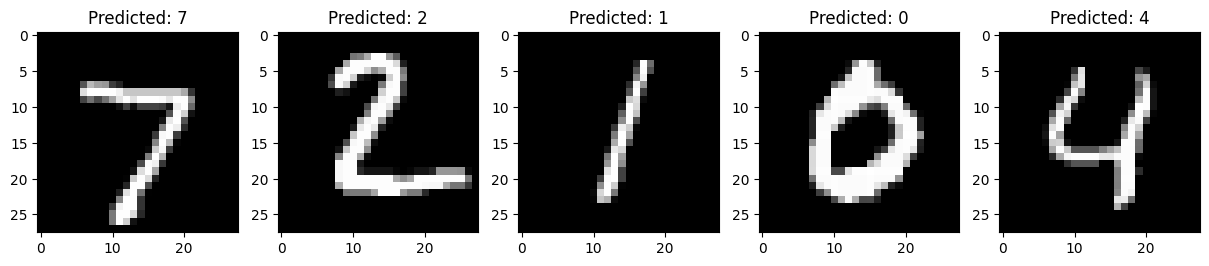

In [6]:
# Hacer predicciones
predictions = model.predict(x_test[:5])

# Mostrar las imágenes y las predicciones
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_test[i], cmap='gray')
    ax.title.set_text(f'Predicted: {np.argmax(predictions[i])}')
plt.show()

In [7]:
# Guardar el modelo
model.save('mnist_model.keras')